#### sklearn.neighbors.KNeighborsClassifier
* class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [1]:
from sklearn.datasets import load_iris 
iris = load_iris() 

from sklearn.model_selection import train_test_split 

x= iris.data 
y= iris.target 

x_tr, x_test, y_tr, y_test = train_test_split(x,y , test_size=0.2, random_state=1, stratify=y)

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_tr, y_tr )

y_pred = knn.predict(x_test) 
scores = metrics.accuracy_score(y_test, y_pred)
scores

classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

x_new=[[3,4,5,2], [5,4,2,2]]

predict = knn.predict(x_new)
classes[predict[0]]
classes[predict[1]]

'setosa'

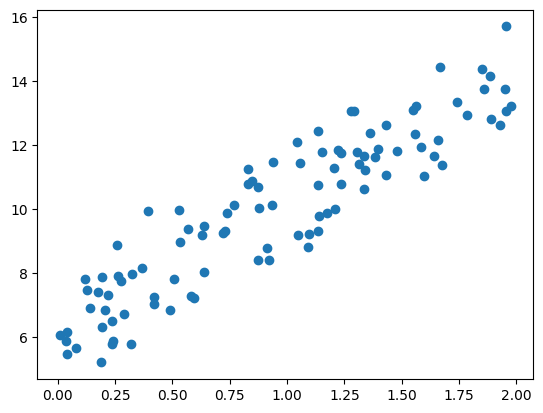

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 +4*X + np.random.randn(100,1)

plt.scatter(X,y)
# print(y)

In [5]:
def get_weight_updates(w1,w0,x,y, learning_late = 0.01):
    N=len(y)

    w1_update = np.zeros_like(w1) #초기값 0
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(x,w1.T) + w0 # yhat = wx+b
    diff = y-y_pred #잔차

    w0_factors = np.ones((N,1))

    w1_update = - (2/N) * learning_late*(np.dot(x.T,diff))
    w0_update = -(2/N) * learning_late*(np.dot(w0_factors.T,diff))
    #learning_late = 에타값
    

    return w1_update, w0_update

In [6]:
def gradient_descent_steps(x,y, iters=1000):

    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_late=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0 

In [20]:
def get_cost(y, y_pred):
    N= len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)

print(w1, w0)
y_pred = w1[0,0]*X +w0
print(f'최종 mse 값은 : {get_cost(y,y_pred)} ')

[[4.02181364]] [[6.16203122]]
최종 mse 값은 : 0.9934784315632568 


In [29]:
def gradient_descent_steps_detail(x,y, iters=1000):

    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_late=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        y_pred = np.dot(x,w1.T) + w0 # yhat = wx+b
        if ind % 10 == 0 :
            cost = get_cost(y, y_pred)
            print(f'{ind}번째 mse : {cost} 이고  w1 : {w1[0,0]} , w0 : {w0[0,0]}' )
            print('==================================')
    return w1, w0 

In [33]:
w1, w0 = gradient_descent_steps_detail(X,y,iters=5000)

print(w1, w0)

0번째 mse : 97.29699213674446 이고  w1 : 0.2150268139164703 , w0 : 0.19949370120354534
10번째 mse : 42.741022251821796 이고  w1 : 1.9246064315478582 , w0 : 1.801870209716973
20번째 mse : 19.257634065369572 이고  w1 : 3.032489219877281 , w0 : 2.8676331644565956
30번째 mse : 9.138819494959423 이고  w1 : 3.7462028332556856 , w0 : 3.5810140060009035
40번째 mse : 4.76887369337608 이고  w1 : 4.201829466761866 , w0 : 4.06284576751452
50번째 mse : 2.872460161051896 이고  w1 : 4.4885981858188595 , w0 : 4.392384666221858
60번째 mse : 2.0408949111715513 이고  w1 : 4.665012431962569 , w0 : 4.621620602372831
70번째 mse : 1.6682834271118496 이고  w1 : 4.769426342498626 , w0 : 4.784661923139716
80번째 mse : 1.4939883429976097 이고  w1 : 4.826980632192149 , w0 : 4.903889915142777
90번째 mse : 1.4058597804522892 이고  w1 : 4.8541510954659595 , w0 : 4.993994901710678
100번째 mse : 1.3556110304333238 이고  w1 : 4.861731478190142 , w0 : 5.064623107337121
110번째 mse : 1.3224242260876653 이고  w1 : 4.856789617736342 , w0 : 5.122112470218459
120번째 mse : 

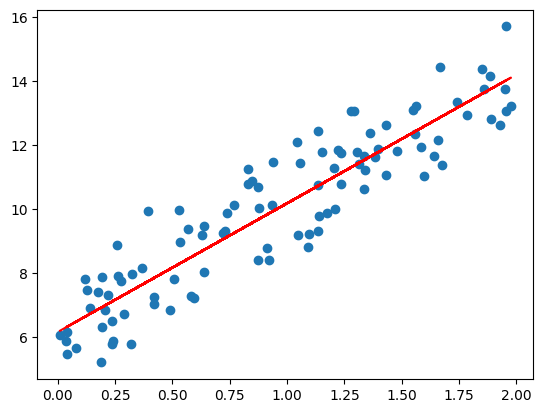

In [36]:
plt.scatter(X,y)
plt.plot(X , y_pred ,c='r')

In [37]:
np.zeros((1,1))

array([[0.]])